# Homework 1

In [1]:
import numpy as np
import sympy as sp
from sympy import *

In [2]:
import matplotlib as mpl
# mpl.use('Qt5Agg')
import matplotlib.pyplot as plt
# plt.ion()

In [3]:
%qtconsole

# Question 1

In [4]:
def generate_rotation_matrix():
    v = np.random.rand(3)
    
    v_hat = v / np.linalg.norm(v)
    
    theta = np.random.rand() * 2 * np.pi
    
    nx = np.array([[0, -v_hat[2], v_hat[1]],
                    [v_hat[2], 0, -v_hat[0]],
                    [-v_hat[1], v_hat[0], 0]])
    
    matrix = np.identity(3) + np.sin(theta) * nx + (1 - np.cos(theta)) * nx @ nx
    
    return matrix

In [5]:
R1 = generate_rotation_matrix()
R2 = generate_rotation_matrix()
R3 = generate_rotation_matrix()
R4 = generate_rotation_matrix()
R5 = generate_rotation_matrix()
R6 = generate_rotation_matrix()
R7 = generate_rotation_matrix()
R8 = generate_rotation_matrix()
R9 = generate_rotation_matrix()
matrices = [R1, R2, R3, R4, R5, R6, R7, R8, R9]

det1 = np.linalg.det(R1)
det2 = np.linalg.det(R2)
det3 = np.linalg.det(R3)
det4 = np.linalg.det(R4)
det5 = np.linalg.det(R5)
det6 = np.linalg.det(R6)
det7 = np.linalg.det(R7)
det8 = np.linalg.det(R8)
det9 = np.linalg.det(R9)
determinants = [det1, det2, det3, det4, det5, det6, det7, det8, det9]

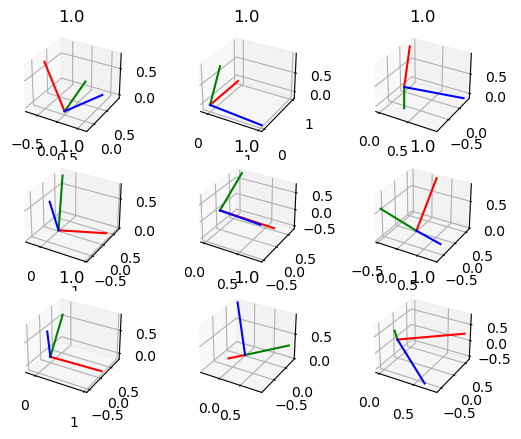

In [6]:
def plot_frame(R, ax):
    ax.plot([0, R[0,0]], [0, R[1,0]], [0, R[2,0]], 'r')
    ax.plot([0, R[0,1]], [0, R[1,1]], [0, R[2,1]], 'g')
    ax.plot([0, R[0,2]], [0, R[1,2]], [0, R[2,2]], 'b')
    
fig = plt.figure()

for i in range(9):
    ax = fig.add_subplot(3,3,i+1,projection='3d', adjustable='box')
    ax.title.set_text(round(determinants[i], 4))
    plot_frame(matrices[i], ax)

# Question 2

In [7]:
rand_matrix = generate_rotation_matrix()
rand_vector = np.random.rand(3)
length_i = np.sqrt(rand_vector[0] ** 2 + rand_vector[1] ** 2 + rand_vector[2] ** 2)
rotated_vector = rand_matrix @ rand_vector
length_f = np.sqrt(rotated_vector[0] ** 2 + rotated_vector[1] ** 2 + rotated_vector[2] ** 2)

print("Length before rotation: " + str(length_i))
print("Length after rotation: " + str(length_f))

Length before rotation: 1.1834642243896702
Length after rotation: 1.1834642243896705


# Question 3

In [8]:
def plot_trans_matrix(T):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d', adjustable='box')
    ax.plot([0, T[0,3]], [0, T[1,3]], [0, T[2,3]], color = 'black')

    ax.plot([T[0,3], T[0,3] + T[0,0]], [T[1,3], T[1,3] + T[1,0]], [T[2,3], T[2,3] + T[2,0]], 'r')
    ax.plot([T[0,3], T[0,3] + T[0,1]], [T[1,3], T[1,3] + T[1,1]], [T[2,3], T[2,3] + T[2,1]], 'g')
    ax.plot([T[0,3], T[0,3] + T[0,2]], [T[1,3], T[1,3] + T[1,2]], [T[2,3], T[2,3] + T[2,2]], 'b')

In [9]:
rotation_matrix = generate_rotation_matrix()
translation_matrix = (np.random.rand(3,1) - 0.5) * 2
transformation_matrix = np.vstack((np.hstack((rotation_matrix, translation_matrix)), np.array([0, 0, 0, 1])))

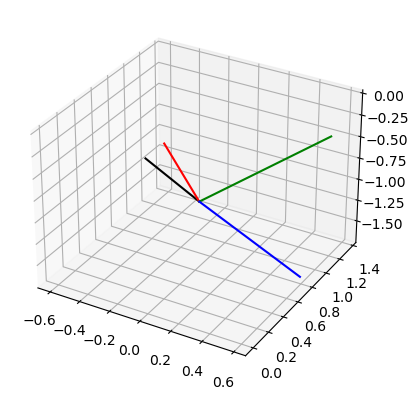

In [10]:
plot_trans_matrix(transformation_matrix)

In [11]:
print("Translation vector:")
print(translation_matrix)
print("Rotation matrix:")
print(rotation_matrix)

Translation vector:
[[ 0.03123012]
 [ 0.59343825]
 [-0.92691325]]
Rotation matrix:
[[-0.62945063  0.5553031   0.54353506]
 [ 0.7523059   0.61059442  0.24740712]
 [-0.19449354  0.5646352  -0.80209685]]


In [12]:
homo_rand_vector = np.vstack(((np.random.rand(3,1) - 0.5) * 2, 1))
transformed_vector = transformation_matrix @ homo_rand_vector

In [13]:
print("Original homogenous vector:")
print(homo_rand_vector)
print("Transformed homogenous vector:")
print(transformed_vector)

Original homogenous vector:
[[0.56039352]
 [0.75564474]
 [0.09347974]
 [1.        ]]
Transformed homogenous vector:
[[ 0.14891144]
 [ 1.49954562]
 [-0.68422235]
 [ 1.        ]]


# Question 4

In [14]:
(t, alpha, beta, gamma) = sp.symbols('t, alpha(t), beta(t), gamma(t)', real = True)
alpha = Function('alpha', real=True)(t)
beta = Function('beta', real=True)(t)
gamma = Function('gamma', real=True)(t)

In [15]:
Rz_alpha = Matrix([[cos(alpha), -sin(alpha), 0],
             [sin(alpha), cos(alpha), 0],
             [0, 0, 1]])
Ry_beta = Matrix([[cos(beta), 0, sin(beta)],
               [0, 1, 0],
               [-sin(beta), 0, cos(beta)]])
Rz_gamma = Matrix([[cos(gamma), -sin(gamma), 0],
             [sin(gamma), cos(gamma), 0],
             [0, 0, 1]])
R = Rz_alpha @ Ry_beta @ Rz_gamma

In [16]:
R

Matrix([
[-sin(alpha(t))*sin(gamma(t)) + cos(alpha(t))*cos(beta(t))*cos(gamma(t)), -sin(alpha(t))*cos(gamma(t)) - sin(gamma(t))*cos(alpha(t))*cos(beta(t)), sin(beta(t))*cos(alpha(t))],
[ sin(alpha(t))*cos(beta(t))*cos(gamma(t)) + sin(gamma(t))*cos(alpha(t)), -sin(alpha(t))*sin(gamma(t))*cos(beta(t)) + cos(alpha(t))*cos(gamma(t)), sin(alpha(t))*sin(beta(t))],
[                                            -sin(beta(t))*cos(gamma(t)),                                              sin(beta(t))*sin(gamma(t)),               cos(beta(t))]])

In [17]:
Rdot = diff(R, t)

In [18]:
Rdot

Matrix([
[-sin(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(alpha(t), t) - sin(alpha(t))*cos(gamma(t))*Derivative(gamma(t), t) - sin(beta(t))*cos(alpha(t))*cos(gamma(t))*Derivative(beta(t), t) - sin(gamma(t))*cos(alpha(t))*cos(beta(t))*Derivative(gamma(t), t) - sin(gamma(t))*cos(alpha(t))*Derivative(alpha(t), t), sin(alpha(t))*sin(gamma(t))*cos(beta(t))*Derivative(alpha(t), t) + sin(alpha(t))*sin(gamma(t))*Derivative(gamma(t), t) + sin(beta(t))*sin(gamma(t))*cos(alpha(t))*Derivative(beta(t), t) - cos(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(gamma(t), t) - cos(alpha(t))*cos(gamma(t))*Derivative(alpha(t), t), -sin(alpha(t))*sin(beta(t))*Derivative(alpha(t), t) + cos(alpha(t))*cos(beta(t))*Derivative(beta(t), t)],
[-sin(alpha(t))*sin(beta(t))*cos(gamma(t))*Derivative(beta(t), t) - sin(alpha(t))*sin(gamma(t))*cos(beta(t))*Derivative(gamma(t), t) - sin(alpha(t))*sin(gamma(t))*Derivative(alpha(t), t) + cos(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(alpha(t), t) + cos(alpha(t))

In [19]:
omega_skew = simplify(Rdot @ R.T)

In [20]:
omega_skew

Matrix([
[                                                                                         0,                            -cos(beta(t))*Derivative(gamma(t), t) - Derivative(alpha(t), t), sin(alpha(t))*sin(beta(t))*Derivative(gamma(t), t) + cos(alpha(t))*Derivative(beta(t), t)],
[                            cos(beta(t))*Derivative(gamma(t), t) + Derivative(alpha(t), t),                                                                                          0, sin(alpha(t))*Derivative(beta(t), t) - sin(beta(t))*cos(alpha(t))*Derivative(gamma(t), t)],
[-sin(alpha(t))*sin(beta(t))*Derivative(gamma(t), t) - cos(alpha(t))*Derivative(beta(t), t), -sin(alpha(t))*Derivative(beta(t), t) + sin(beta(t))*cos(alpha(t))*Derivative(gamma(t), t),                                                                                         0]])

In [21]:
omega_x = omega_skew[:,0]
omega_y = omega_skew[:,1]
omega_z = omega_skew[:,2]

In [22]:
omega_x

Matrix([
[                                                                                         0],
[                            cos(beta(t))*Derivative(gamma(t), t) + Derivative(alpha(t), t)],
[-sin(alpha(t))*sin(beta(t))*Derivative(gamma(t), t) - cos(alpha(t))*Derivative(beta(t), t)]])

In [23]:
omega_y

Matrix([
[                           -cos(beta(t))*Derivative(gamma(t), t) - Derivative(alpha(t), t)],
[                                                                                         0],
[-sin(alpha(t))*Derivative(beta(t), t) + sin(beta(t))*cos(alpha(t))*Derivative(gamma(t), t)]])

In [24]:
omega_z

Matrix([
[sin(alpha(t))*sin(beta(t))*Derivative(gamma(t), t) + cos(alpha(t))*Derivative(beta(t), t)],
[sin(alpha(t))*Derivative(beta(t), t) - sin(beta(t))*cos(alpha(t))*Derivative(gamma(t), t)],
[                                                                                        0]])